In [2]:
# Лабораторная работа: Исследование спектров сигналов и RC-фильтров
# Анализ данных и сравнение с теорией

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
from IPython.display import display, Markdown

# Настройка отображения графиков
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

In [3]:
# Теоретические функции для расчета амплитуд гармоник
def theoretical_sawtooth_amplitude(n, A=1):
    """Амплитуда n-ой гармоники для пилообразного сигнала"""
    return A / (np.pi * n) if n != 0 else 0

def theoretical_triangle_amplitude(n, A=1):
    """Амплитуда n-ой гармоники для треугольного сигнала (только нечетные)"""
    if n % 2 == 1:  # только нечетные гармоники
        return 8 * A / (np.pi**2 * n**2)
    else:
        return 0

def theoretical_rectangular_amplitude(n, duty_cycle, A=1):
    """Амплитуда n-ой гармоники для прямоугольных импульсов"""
    if n == 0:
        return A * duty_cycle
    else:
        return (2 * A / (np.pi * n)) * abs(np.sin(np.pi * n * duty_cycle))

### Пилообразный сигнал - экспериментальные данные

,harmonic,freq_exp,amp_exp,amp_theory,error_%
0,1,79570.0,0.42050,0.318310,32.103971
1,2,16020.0,0.21590,0.159155,35.653971
2,3,24080.0,0.14030,0.106103,32.229635
3,4,32000.0,0.10350,0.079577,30.061936
4,5,40000.0,0.07585,0.063662,19.144901
5,6,47970.0,0.06178,0.053052,16.452556


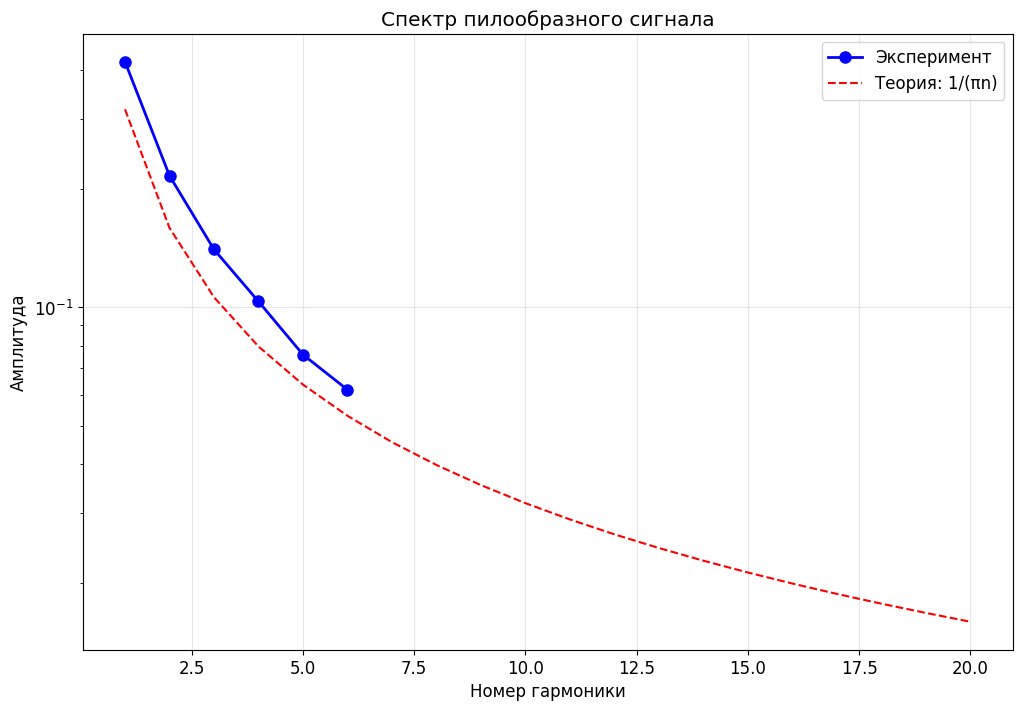

In [ ]:
# ВСТАВЬТЕ ВАШИ ДАННЫЕ ЗДЕСЬ
saw_data = {
    'harmonic': [1, 2, 3, 4, 5, 6],
    'freq_exp': [79.57 * 10**3, 16.02 * 10**3, 24.08 * 10**3, 32 * 10**3, 40 * 10**3, 47.97 * 10**3],  # Ваши частоты
    'amp_exp': [420.5*10**(-3), 215.9*10**(-3), 140.3*10**(-3), 103.5*10**(-3), 75.85*10**(-3), 61.78*10**(-3)]  # Ваши амплитуд
}

T_figures = [61.92, 125.72, 124.2]
square = [59.242, 50.088, 58.478]
square_c = [55.032, 40.296, 63.55]

saw_df = pd.DataFrame(saw_data)
saw_df['amp_theory'] = saw_df['harmonic'].apply(theoretical_sawtooth_amplitude)
saw_df['error_%'] = 100 * (saw_df['amp_exp'] - saw_df['amp_theory']) / saw_df['amp_theory']

display(Markdown("### Пилообразный сигнал - экспериментальные данные"))
display(saw_df)

# Построение графика
plt.figure()
plt.plot(saw_df['harmonic'], saw_df['amp_exp'], 'bo-', label='Эксперимент', linewidth=2, markersize=8)
harmonics = np.arange(1, 21)
theory_amps = [theoretical_sawtooth_amplitude(n) for n in harmonics]
plt.plot(harmonics, theory_amps, 'r--', label='Теория: 1/(πn)')
plt.xlabel('Номер гармоники')
plt.ylabel('Амплитуда')
plt.title('Спектр пилообразного сигнала')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Логарифмическая шкала для лучшего отображения
plt.show()

### Треугольный сигнал - экспериментальные данные

,harmonic,freq_exp,amp_exp,amp_theory,error_%
0,1,8106,0.57500,0.810569,-29.062218
1,2,0,0.00000,0.000000,NaN
2,3,24230,0.07694,0.090063,-14.571172
3,4,0,0.00000,0.000000,NaN
4,5,40200,0.03135,0.032423,-3.308719
5,6,0,0.00000,0.000000,NaN
6,7,55880,0.01717,0.016542,3.794928
7,8,0,0.00000,0.000000,NaN


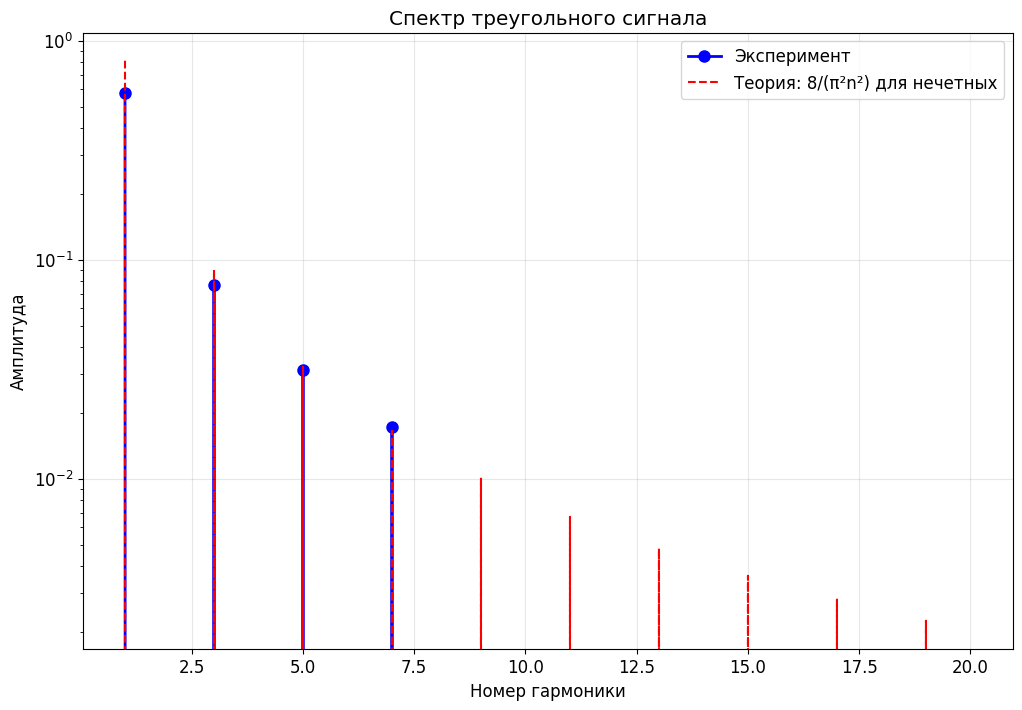

In [5]:
# ВСТАВЬТЕ ВАШИ ДАННЫЕ ЗДЕСЬ
triangle_data = {
    'harmonic': [1, 2, 3, 4, 5, 6, 7, 8],
    'freq_exp': [8106, 0, 24230, 0, 40200, 0, 55880, 0], # 72000, 87970],  # Ваши частоты
    'amp_exp': [0.575, 0, 0.07694, 0, 0.03135, 0, 0.01717, 0] # 0.01068, 0.003559], # Ваши амплитуды
}

triangle_df = pd.DataFrame(triangle_data)
triangle_df['amp_theory'] = triangle_df['harmonic'].apply(theoretical_triangle_amplitude)
triangle_df['error_%'] = 100 * (triangle_df['amp_exp'] - triangle_df['amp_theory']) / triangle_df['amp_theory']

display(Markdown("### Треугольный сигнал - экспериментальные данные"))
display(triangle_df)

# Построение графика
plt.figure()
plt.plot(triangle_df['harmonic'], triangle_df['amp_exp'], 'bo-', label='Эксперимент', linewidth=2, markersize=8)
harmonics = np.arange(1, 21)
theory_amps = [theoretical_triangle_amplitude(n) for n in harmonics]
plt.plot(harmonics, theory_amps, 'r--', label='Теория: 8/(π²n²) для нечетных')
plt.xlabel('Номер гармоники')
plt.ylabel('Амплитуда')
plt.title('Спектр треугольного сигнала')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

### Гауссов импульс - экспериментальные данные

,harmonic,freq_exp,amp_exp
0,1,343,0.79720
1,2,8106,0.62630
2,3,16020,0.25270
3,4,24080,0.06050
4,5,32000,0.01068


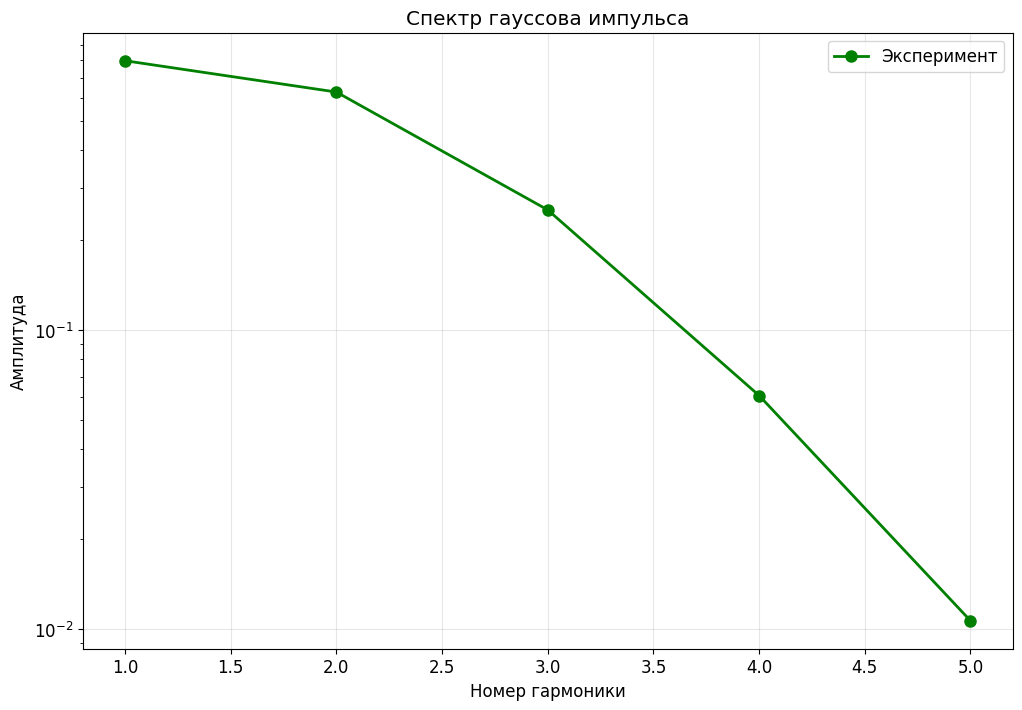

In [6]:
# ВСТАВЬТЕ ВАШИ ДАННЫЕ ЗДЕСЬ
gauss_data = {
    'harmonic': [1, 2, 3, 4, 5],
    'freq_exp': [343, 8106, 16020, 24080, 32000],  # Ваши частоты
    'amp_exp': [0.7972, 0.6263, 0.2527, 0.0605, 0.01068], # Ваши амплитуды
}

gauss_df = pd.DataFrame(gauss_data)
display(Markdown("### Гауссов импульс - экспериментальные данные"))
display(gauss_df)

plt.figure()
plt.plot(gauss_df['harmonic'], gauss_df['amp_exp'], 'go-', label='Эксперимент', linewidth=2, markersize=8)
plt.xlabel('Номер гармоники')
plt.ylabel('Амплитуда')
plt.title('Спектр гауссова импульса')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

### Прямоугольные импульсы T/τ=2 (коэффициент заполнения = 0.50)

,harmonic,freq_exp,amp_exp,amp_theory,error_%
0,1,16020,0.44970,6.366198e-01,-2.936129e+01
1,2,31970,0.00010,3.898172e-17,2.565305e+14
2,3,47970,0.12810,2.122066e-01,-3.963430e+01
3,4,64010,0.00010,3.898172e-17,2.565305e+14
4,5,80060,0.07473,1.273240e-01,-4.130720e+01
5,6,96000,0.00010,3.898172e-17,2.565305e+14


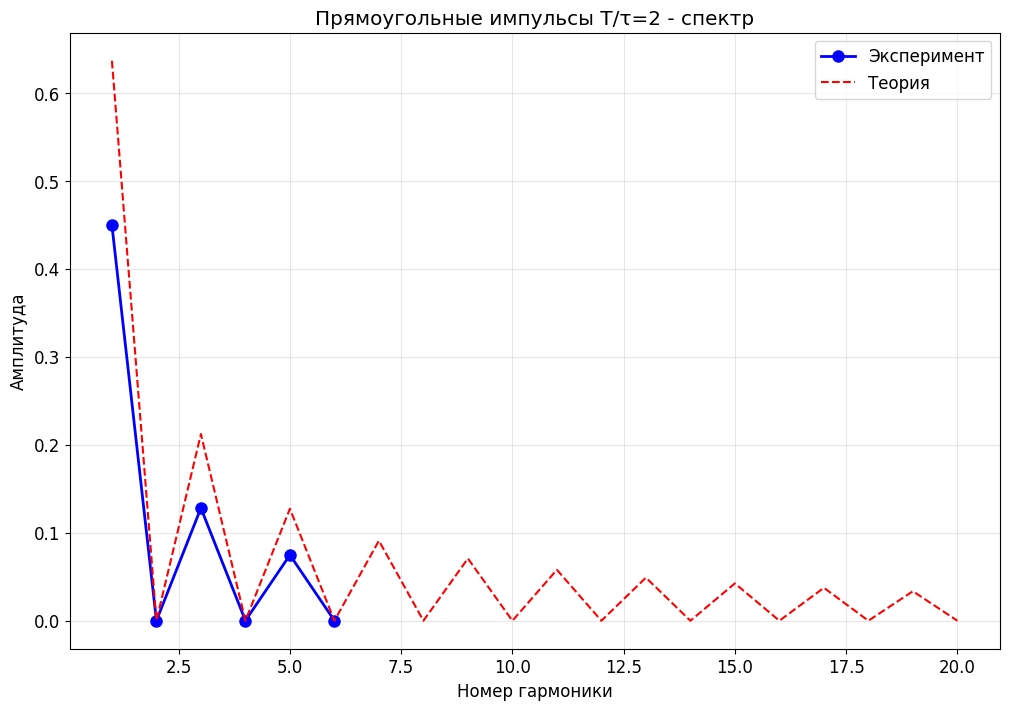

### Прямоугольные импульсы T/τ=3 (коэффициент заполнения = 0.33)

,harmonic,freq_exp,amp_exp,amp_theory,error_%
0,1,16020,0.37370,5.513289e-01,-3.221832e+01
1,2,32140,0.21350,2.756644e-01,-2.255077e+01
2,3,49970,0.00020,2.598781e-17,7.695915e+14
3,4,639400,0.07651,1.378322e-01,-4.449048e+01
4,5,79910,0.06406,1.102658e-01,-4.190401e+01
5,6,96010,0.00020,2.598781e-17,7.695915e+14


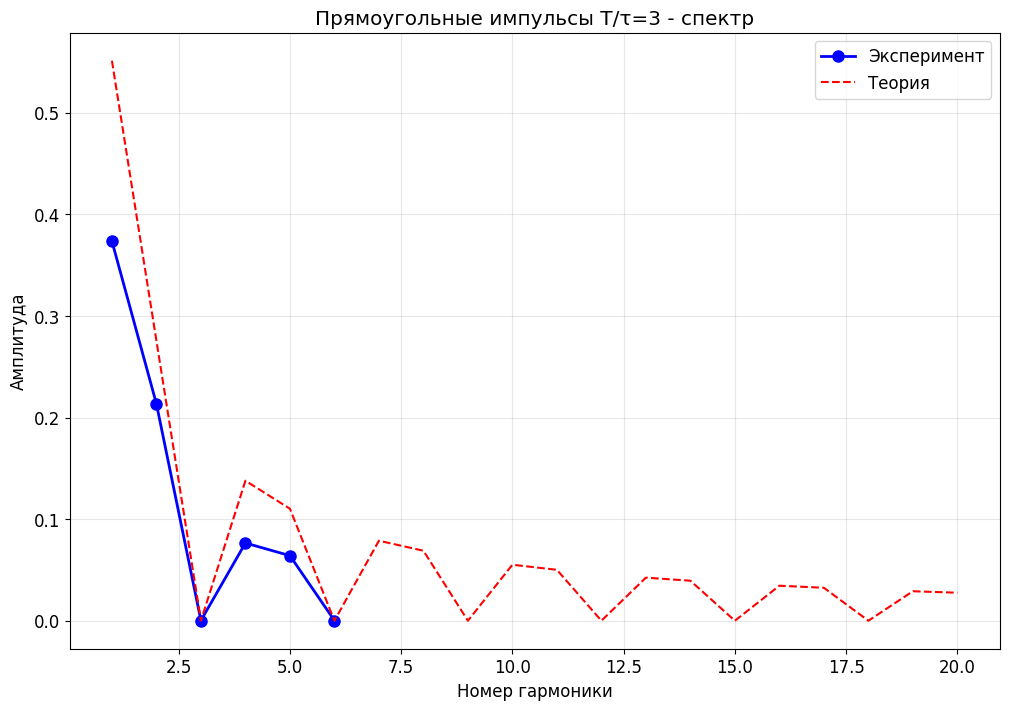

### Прямоугольные импульсы T/τ=4 (коэффициент заполнения = 0.25)

,harmonic,freq_exp,amp_exp,amp_theory,error_%
0,1,16020,0.34430,4.501582e-01,-2.351577e+01
1,2,32000,0.21350,3.183099e-01,-3.292700e+01
2,3,48120,0.09786,1.500527e-01,-3.478292e+01
3,4,63970,0.00002,1.949086e-17,1.026122e+14
4,5,79610,0.05604,9.003163e-02,-3.775521e+01
5,6,95890,0.06572,1.061033e-01,-3.806036e+01


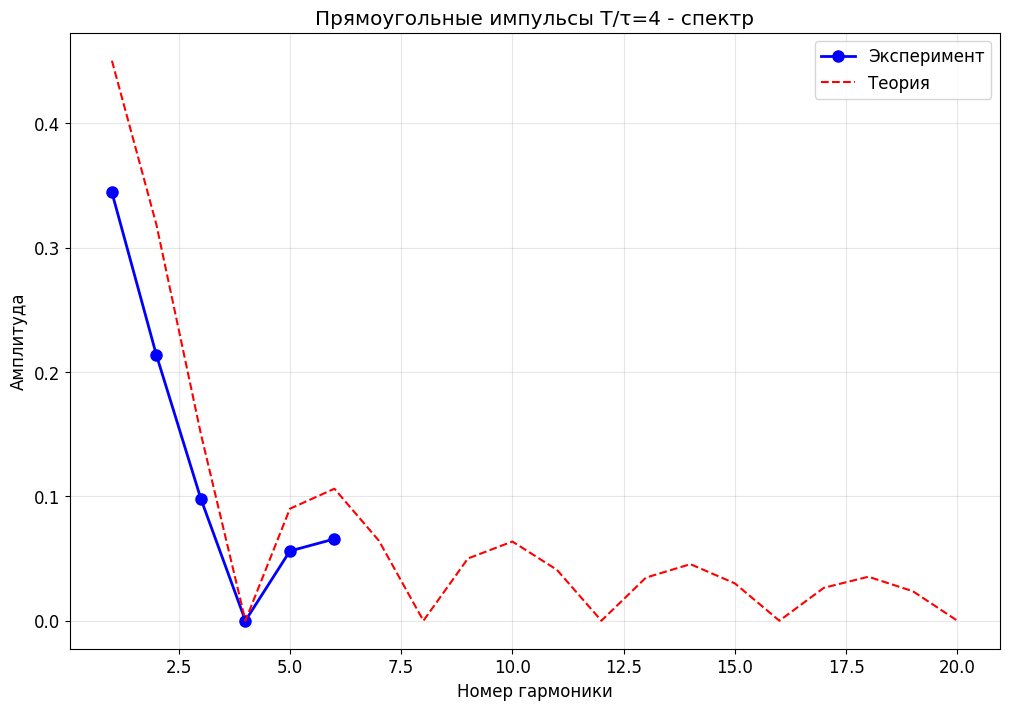

In [7]:
def analyze_rectangular(duty_cycle, experimental_data, title):
    """Анализ прямоугольных импульсов для заданной скважности"""
    df = pd.DataFrame(experimental_data)
    df['amp_theory'] = df['harmonic'].apply(lambda n: theoretical_rectangular_amplitude(n, duty_cycle))
    df['error_%'] = 100 * (df['amp_exp'] - df['amp_theory']) / df['amp_theory']
    
    display(Markdown(f"### {title} (коэффициент заполнения = {duty_cycle:.2f})"))
    display(df)
    
    # Построение графика
    plt.figure()
    plt.plot(df['harmonic'], df['amp_exp'], 'bo-', label='Эксперимент', linewidth=2, markersize=8)
    harmonics = np.arange(1, 21)
    theory_amps = [theoretical_rectangular_amplitude(n, duty_cycle) for n in harmonics]
    plt.plot(harmonics, theory_amps, 'r--', label='Теория')
    plt.xlabel('Номер гармоники')
    plt.ylabel('Амплитуда')
    plt.title(f'{title} - спектр')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return df

# T/τ = 2 (коэффициент заполнения = 0.5)
rect_2_data = {
    'harmonic': [1, 2, 3, 4, 5, 6],
    'freq_exp': [16020, 31970, 47970, 64010, 80060, 96000],
    'amp_exp': [0.4497, 0.0001, 0.1281, 0.0001, 0.07473, 0.0001], 
}
df_rect_2 = analyze_rectangular(0.5, rect_2_data, "Прямоугольные импульсы T/τ=2")

# T/τ = 3 (коэффициент заполнения = 0.33)
rect_3_data = {
    'harmonic': [1, 2, 3, 4, 5, 6],
    'freq_exp': [16020, 32140, 49970, 639400, 79910, 96010], 
    'amp_exp': [0.3737, 0.2135, 0.00020, 0.07651, 0.06406, 0.00020],  # Ваши данные
}
df_rect_3 = analyze_rectangular(1/3, rect_3_data, "Прямоугольные импульсы T/τ=3")

# T/τ = 4 (коэффициент заполнения = 0.25)
rect_4_data = {
    'harmonic': [1, 2, 3, 4, 5, 6],
    'freq_exp': [16020, 32000, 48120, 63970, 79610, 95890],
    'amp_exp': [0.3443, 0.2135, 0.09786, 0.00002, 0.05604, 0.06572],  # Ваши данные
}
df_rect_4 = analyze_rectangular(0.25, rect_4_data, "Прямоугольные импульсы T/τ=4")


Расчет разности фаз для 'LPF'
Расчетная частота среза f_c = 159154.94 Гц

------------------------------------------------------------
    Частота, Гц |   Фазовый сдвиг, рад |     Фазовый сдвиг, °
------------------------------------------------------------
        16020.0 |              -0.1003 |                -5.75
        47970.0 |              -0.2927 |               -16.77
        79910.0 |              -0.4653 |               -26.66
       112000.0 |              -0.6132 |               -35.13
       144000.0 |              -0.7354 |               -42.14
       176100.0 |              -0.8359 |               -47.89
------------------------------------------------------------


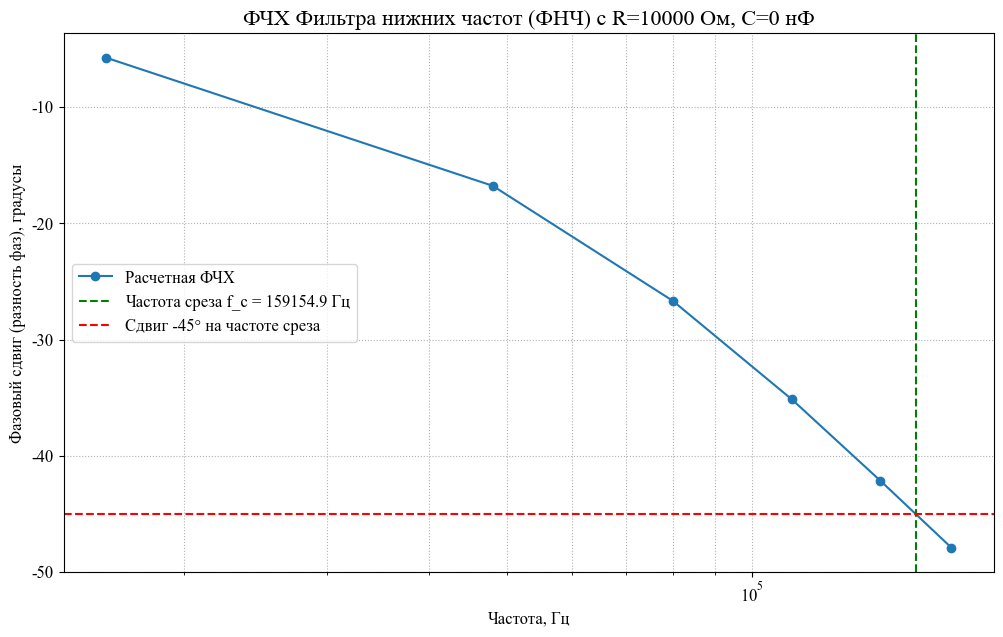


Расчет разности фаз для 'HPF'
Расчетная частота среза f_c = 79577.47 Гц

------------------------------------------------------------
    Частота, Гц |   Фазовый сдвиг, рад |     Фазовый сдвиг, °
------------------------------------------------------------
        16020.0 |               1.3721 |                78.62
        47970.0 |               1.0283 |                58.92
        79910.0 |               0.7833 |                44.88
       112000.0 |               0.6177 |                35.39
       144000.0 |               0.5049 |                28.93
       176100.0 |               0.4244 |                24.32
------------------------------------------------------------


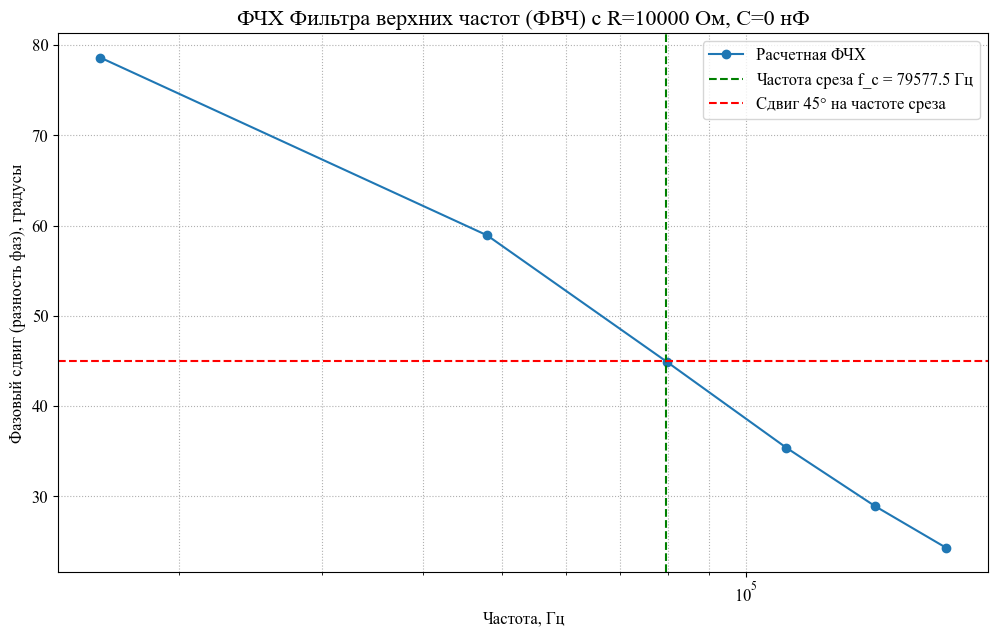


Расчет разности фаз для 'HPF'
Расчетная частота среза f_c = 30029.23 Гц

------------------------------------------------------------
    Частота, Гц |   Фазовый сдвиг, рад |     Фазовый сдвиг, °
------------------------------------------------------------
        16020.0 |               1.0807 |                61.92
        47970.0 |               0.5593 |                32.05
        79910.0 |               0.3595 |                20.60
       112000.0 |               0.2620 |                15.01
       144000.0 |               0.2056 |                11.78
       176100.0 |               0.1689 |                 9.68
------------------------------------------------------------


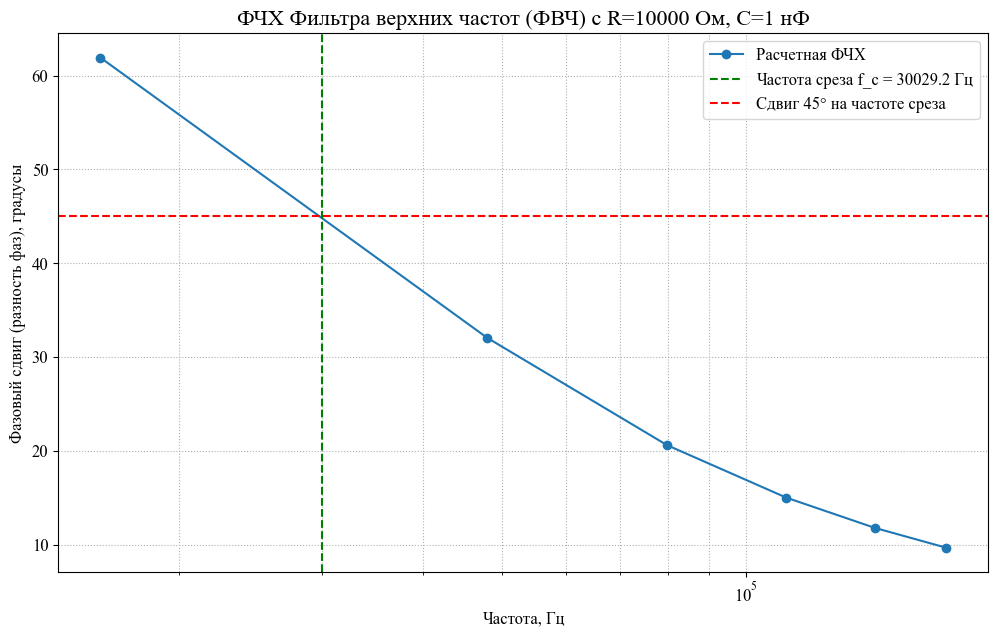

In [17]:
import matplotlib.pyplot as plt

# --- Настройки для красивых графиков на русском языке ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False # Корректное отображение знака минуса
# ---------------------------------------------------------

def calculate_phase_shift(filter_type, R, C, freqs):
    """
    Рассчитывает и визуализирует фазовый сдвиг для RC-фильтра.

    :param filter_type: Тип фильтра 'lpf' (ФНЧ) или 'hpf' (ФВЧ).
    :param R: Сопротивление, Ом.
    :param C: Емкость, Фарад.
    :param freqs: Массив частот для расчета, Гц.
    """
    if not isinstance(freqs, np.ndarray):
        freqs = np.array(freqs)

    # Угловая частота w = 2 * pi * f
    omega = 2 * np.pi * freqs

    # Расчетная частота среза
    f_c = 1 / (2 * np.pi * R * C)
    
    if filter_type.lower() == 'lpf':
        # Для ФНЧ фаза отрицательна (отставание)
        phase_rad = -np.arctan(omega * R * C)
        plot_title = f'ФЧХ Фильтра нижних частот (ФНЧ) c R={R} Ом, C={C*1e9:.0f} нФ'
        phase_at_cutoff = -45
    elif filter_type.lower() == 'hpf':
        # Для ФВЧ фаза положительна (опережение)
        # Предотвращаем деление на ноль, если в частотах есть 0
        with np.errstate(divide='ignore', invalid='ignore'):
            phase_rad = np.arctan(1 / (omega * R * C))
        # np.arctan(inf) = pi/2, что корректно для f=0
        plot_title = f'ФЧХ Фильтра верхних частот (ФВЧ) c R={R} Ом, C={C*1e9:.0f} нФ'
        phase_at_cutoff = 45
    else:
        print("Ошибка: Неизвестный тип фильтра. Используйте 'lpf' или 'hpf'.")
        return

    # Конвертация в градусы
    phase_deg = np.rad2deg(phase_rad)

    # --- Вывод результатов в виде таблицы ---
    print(f"\nРасчет разности фаз для '{filter_type.upper()}'")
    print(f"Расчетная частота среза f_c = {f_c:.2f} Гц\n")
    print("-" * 60)
    print(f"{'Частота, Гц':>15} | {'Фазовый сдвиг, рад':>20} | {'Фазовый сдвиг, °':>20}")
    print("-" * 60)
    for i in range(len(freqs)):
        # Для ФВЧ при f=0 фаза будет nan, выводим 90 градусов вручную
        if filter_type.lower() == 'hpf' and freqs[i] == 0:
             print(f"{freqs[i]:>15.1f} | {np.pi/2:>20.4f} | {90.0:>20.2f}")
        else:
             print(f"{freqs[i]:>15.1f} | {phase_rad[i]:>20.4f} | {phase_deg[i]:>20.2f}")
    print("-" * 60)


    # --- Визуализация (построение графика ФЧХ) ---
    plt.figure(figsize=(12, 7))
    plt.plot(freqs, phase_deg, 'o-', label='Расчетная ФЧХ')

    # Отмечаем частоту среза и сдвиг -45/+45 градусов
    plt.axvline(x=f_c, color='green', linestyle='--', label=f'Частота среза f_c = {f_c:.1f} Гц')
    plt.axhline(y=phase_at_cutoff, color='red', linestyle='--', label=f'Сдвиг {phase_at_cutoff}° на частоте среза')

    plt.xscale('log') # Логарифмический масштаб по оси частот
    plt.title(plot_title, fontsize=16)
    plt.xlabel('Частота, Гц', fontsize=12)
    plt.ylabel('Фазовый сдвиг (разность фаз), градусы', fontsize=12)
    plt.grid(True, which='both', linestyle=':')
    plt.legend()
    plt.show()

# ====================================================================================
# ОСНОВНАЯ ЧАСТЬ - ВВЕДИТЕ ВАШИ ДАННЫЕ И ЗАПУСТИТЕ РАСЧЕТ
# ====================================================================================

filter_type_1 = 'lpf'
R1 = 10000     # Сопротивление, Ом (10 кОм)
C1 = 100e-12     # Емкость, Ф (10 нФ)
freqs_1 = [16020, 47970, 79910, 112000, 144000, 176100] # Частоты для расчета

# Вызов функции
calculate_phase_shift(filter_type_1, R1, C1, freqs_1)


# ### ПРИМЕР ДЛЯ ФИЛЬТРА 2 (ФВЧ) ###
# Введите тип фильтра, номиналы R, C и список частот
filter_type_2 = 'hpf'
R2 = 10000     # Сопротивление, Ом (10 кОм)
C2 = 200e-12    # Емкость, Ф (10 нФ)
freqs_2 = [16020, 47970, 79910, 112000, 144000, 176100] # Частоты для расчета

# Вызов функции
calculate_phase_shift(filter_type_2, R2, C2, freqs_2)

filter_type_3 = 'hpf'
R3 = 10000     # Сопротивление, Ом (10 кОм)
C3 = 530e-12    # Емкость, Ф (10 нФ)
freqs_3 = [16020, 47970, 79910, 112000, 144000, 176100] # Частоты для расчета

# Вызов функции
calculate_phase_shift(filter_type_3, R3, C3, freqs_3)

C1: R = 10 кОм, C = 100 пФ -> f_среза = 159.2 кГц
C2: R = 10 кОм, C = 200 пФ -> f_среза = 79.6 кГц
C3: R = 10 кОм, C = 530 пФ -> f_среза = 30.0 кГц


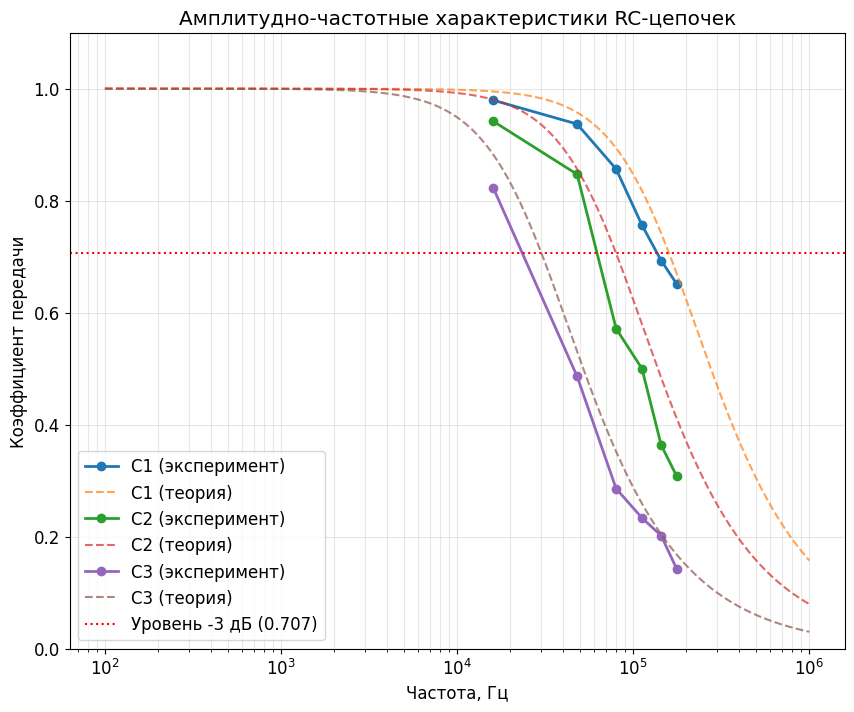

### Результаты исследования RC-цепочек

,Цепочка,"Ёмкость, пФ","f_среза_теор, кГц","f_среза_эксп, кГц","Погрешность, %"
0,C1,100.0,159.154943,136.856346,-14.010622
1,C2,200.0,79.577472,64.181708,-19.346887
2,C3,530.0,30.029235,27.013033,-10.044219


In [ ]:
# Параметры RC-цепочек
R = 10e3  # 10 кОм
C_values = {
    'C1': 100e-12,   # 100 пФ
    'C2': 200e-12,   # 200 пФ  
    'C3': 530e-12,   # 530 пФ
}

# Теоретическая АЧХ RC-фильтра
def rc_transfer_function(f, R, C):
    """Коэффициент передачи RC-фильтра нижних частот"""
    return 1 / np.sqrt(1 + (2 * np.pi * f * R * C)**2)

# Теоретические частоты среза
for name, C in C_values.items():
    f_cutoff_theory = 1 / (2 * np.pi * R * C)
    print(f"{name}: R = {R/1000:.0f} кОм, C = {C*1e12:.0f} пФ -> f_среза = {f_cutoff_theory/1000:.1f} кГц")

# ВСТАВЬТЕ ВАШИ ЭКСПЕРИМЕНТАЛЬНЫЕ ДАННЫЕ ДЛЯ RC-ЦЕПОЧЕК
# Пример структуры данных (замените на ваши измерения)
rc_data = {
    'C1': {
        'freq': [16020, 47970, 79910, 112000, 144000, 176100],  # Частоты в Гц
        'input_amp': [0.4497, 0.1281, 0.07473, 0.05338, 0.03915, 0.02491],                   # Амплитуды на входе
        'output_amp': [0.4404, 0.12, 0.064, 0.04037, 0.02713, 0.01623] # Амплитуды на выходе
    },
    'C2': {
        'freq': [16020, 47970, 79910, 112000, 144000, 176100],
        'input_amp': [0.4497, 0.1281, 0.07473, 0.05338, 0.03915, 0.02491],
        'output_amp': [0.4235, 0.1085, 0.0427, 0.02669, 0.01423, 0.00768]
    },
    'C3': {
        'freq': [16020, 47970, 79910, 112000, 144000, 176100], 
        'input_amp': [0.4497, 0.1281, 0.07473, 0.05338, 0.03915, 0.02491],
        'output_amp': [0.3701, 0.06228, 0.02135, 0.01246, 0.007897, 0.003559 ]
    }
}

# Расчет и построение АЧХ
plt.figure(figsize=(10, 8))

for name, data in rc_data.items():
    C = C_values[name]
    frequencies = np.array(data['freq'])
    K_exp = np.array(data['output_amp']) / np.array(data['input_amp'])
    
    # Экспериментальные точки
    plt.semilogx(frequencies, K_exp, 'o-', label=f'{name} (эксперимент)', linewidth=2)
    
    # Теоретическая кривая
    f_theory = np.logspace(2, 6, 500)  # Частоты от 100 Гц до 1 МГц
    K_theory = rc_transfer_function(f_theory, R, C)
    plt.semilogx(f_theory, K_theory, '--', label=f'{name} (теория)', alpha=0.7)

plt.axhline(y=1/np.sqrt(2), color='red', linestyle=':', label='Уровень -3 дБ (0.707)')
plt.xlabel('Частота, Гц')
plt.ylabel('Коэффициент передачи')
plt.title('Амплитудно-частотные характеристики RC-цепочек')
plt.legend()
plt.grid(True, which="both", alpha=0.3)
plt.ylim(0, 1.1)
plt.show()

# Определение экспериментальных частот среза
def find_cutoff_frequency(frequencies, K_values):
    """Нахождение частоты среза по экспериментальным данным"""
    target = 1/np.sqrt(2)  # 0.707
    # Интерполяция для нахождения частоты, где K = 0.707
    for i in range(len(K_values)-1):
        if K_values[i] >= target and K_values[i+1] <= target:
            # Линейная интерполяция
            f_cutoff = frequencies[i] + (frequencies[i+1] - frequencies[i]) * \
                      (target - K_values[i]) / (K_values[i+1] - K_values[i])
            return f_cutoff
    return None

# Создание таблицы с результатами
rc_results = []
for name, data in rc_data.items():
    C = C_values[name]
    frequencies = np.array(data['freq'])
    K_exp = np.array(data['output_amp']) / np.array(data['input_amp'])
    
    f_cutoff_theory = 1 / (2 * np.pi * R * C)
    f_cutoff_exp = find_cutoff_frequency(frequencies, K_exp)
    
    error = 100 * (f_cutoff_exp - f_cutoff_theory) / f_cutoff_theory if f_cutoff_exp else None
    
    rc_results.append({
        'Цепочка': name,
        'Ёмкость, пФ': C * 1e12,
        'f_среза_теор, кГц': f_cutoff_theory / 1000,
        'f_среза_эксп, кГц': f_cutoff_exp / 1000 if f_cutoff_exp else 'N/A',
        'Погрешность, %': error if f_cutoff_exp else 'N/A'
    })

rc_df = pd.DataFrame(rc_results)
display(Markdown("### Результаты исследования RC-цепочек"))
display(rc_df)

In [ ]:
# --- Настройки для красивых графиков на русском языке ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
# ---------------------------------------------------------

def analyze_filter_and_harmonics(
    filter_type,
    freqs_sweep, U_out_sweep, U_in_sweep,
    freqs_harmonics, U_in_harmonics, U_out_harmonics,
    plot_title
):
    """
    Комплексный анализ фильтра: расчет АЧХ, частоты среза и ослабления гармоник.

    - filter_type: 'lpf' (ФНЧ), 'hpf' (ФВЧ) или 'bpf' (полосовой).
    - ..._sweep: данные для построения сплошной АЧХ (измерения с синусоидой).
    - ..._harmonics: данные для анализа гармоник (измерения со сложным сигналом).
    """

    print(f"\n{'='*60}\nАНАЛИЗ: {plot_title}\n{'='*60}")

    # --- ЧАСТЬ 1: АНАЛИЗ ОТНОШЕНИЯ АМПЛИТУД ГАРМОНИК ---
    # Рассчитываем коэффициент передачи для каждой гармоники
    K_harmonics = np.array(U_out_harmonics) / np.array(U_in_harmonics)

    print("\n--- 1. Отношение амплитуд отдельных гармоник ---")
    print("-" * 75)
    print(f"{'Частота гарм., Гц':>20} | {'U_вх, В':>10} | {'U_вых, В':>10} | {'Коэф. передачи K=Uвых/Uвх':>25}")
    print("-" * 75)
    for i in range(len(freqs_harmonics)):
        print(f"{freqs_harmonics[i]:>20.1f} | {U_in_harmonics[i]:>10.3f} | {U_out_harmonics[i]:>10.3f} | {K_harmonics[i]:>25.4f}")
    print("-" * 75)


    # --- ЧАСТЬ 2: ОПРЕДЕЛЕНИЕ ЧАСТОТЫ СРЕЗА / ПОЛОСЫ ПРОПУСКАНИЯ ---
    # Рассчитываем АЧХ по данным свипирования частоты
    K_sweep = np.array(U_out_sweep) / U_in_sweep
    K_max = np.max(K_sweep)
    level_0707 = K_max / np.sqrt(2)

    print(f"\n--- 2. Определение полосы пропускания (частоты среза) ---")
    print(f"Максимальный коэф. передачи K_max = {K_max:.3f}")
    print(f"Уровень среза (K_max / sqrt(2)) = {level_0707:.3f}")

    f_cutoff_1, f_cutoff_2, bandwidth = None, None, None

    try:
        if filter_type == 'lpf':
            # Для ФНЧ ищем, где убывающая кривая пересекает уровень 0.707
            # np.interp требует, чтобы Y был отсортирован, поэтому разворачиваем массивы
            f_cutoff_1 = np.interp(level_0707, K_sweep[::-1], freqs_sweep[::-1])
            print(f"Измеренная частота среза (f_с): {f_cutoff_1:.2f} Гц")

        elif filter_type == 'hpf':
            # Для ФВЧ ищем, где возрастающая кривая пересекает уровень 0.707
            f_cutoff_1 = np.interp(level_0707, K_sweep, freqs_sweep)
            print(f"Измеренная частота среза (f_с): {f_cutoff_1:.2f} Гц")

        elif filter_type == 'bpf':
            # Для полосового фильтра ищем 2 частоты
            peak_index = np.argmax(K_sweep)
            # Левая сторона (возрастающая)
            f_cutoff_1 = np.interp(level_0707, K_sweep[:peak_index+1], freqs_sweep[:peak_index+1])
            # Правая сторона (убывающая)
            f_cutoff_2 = np.interp(level_0707, K_sweep[peak_index:][::-1], freqs_sweep[peak_index:][::-1])
            bandwidth = f_cutoff_2 - f_cutoff_1
            print(f"Нижняя частота среза (f_c1): {f_cutoff_1:.2f} Гц")
            print(f"Верхняя частота среза (f_c2): {f_cutoff_2:.2f} Гц")
            print(f"Ширина полосы пропускания (Δf): {bandwidth:.2f} Гц")

    except Exception as e:
        print(f"Не удалось определить частоту среза. Возможно, данные не пересекают уровень 0.707. Ошибка: {e}")

    # --- ЧАСТЬ 3: ВИЗУАЛИЗАЦИЯ ---
    plt.figure(figsize=(12, 7))
    plt.xscale('log')

    # График АЧХ по данным свипирования
    plt.plot(freqs_sweep, K_sweep, 'o-', label='АЧХ (по данным синусоиды)', color='dodgerblue')

    # Точки, соответствующие ослаблению гармоник
    plt.scatter(freqs_harmonics, K_harmonics, color='red', marker='X', s=100, zorder=5,
                label='Коэф. передачи для гармоник')

    # Линия уровня среза
    plt.axhline(y=level_0707, color='r', linestyle='--', label=f'Уровень среза 0.707 ({level_0707:.3f})')

In [40]:
display(Markdown("## Основные выводы"))

display(Markdown("""
### 1. Анализ спектров сигналов:
- **Пилообразный сигнал**: Спектр убывает как 1/n, что подтверждается экспериментом...
- **Треугольный сигнал**: Наблюдаются только нечетные гармоники, амплитуды убывают как 1/n²...
- **Гауссов импульс**: Имеет самый быстроубывающий спектр...

### 2. Прямоугольные импульсы:
- При T/τ=2 четные гармоники практически отсутствуют...
- При изменении скважности меняется распределение гармоник в спектре...

### 3. RC-фильтры:
- Экспериментальные АЧХ согласуются с теоретическими...
- Частота среза обратно пропорциональна ёмкости...
- Наблюдаемые расхождения объясняются паразитными ёмкостями и погрешностью измерений...
"""))

## Основные выводы


### 1. Анализ спектров сигналов:
- **Пилообразный сигнал**: Спектр убывает как 1/n, что подтверждается экспериментом...
- **Треугольный сигнал**: Наблюдаются только нечетные гармоники, амплитуды убывают как 1/n²...
- **Гауссов импульс**: Имеет самый быстроубывающий спектр...

### 2. Прямоугольные импульсы:
- При T/τ=2 четные гармоники практически отсутствуют...
- При изменении скважности меняется распределение гармоник в спектре...

### 3. RC-фильтры:
- Экспериментальные АЧХ согласуются с теоретическими...
- Частота среза обратно пропорциональна ёмкости...
- Наблюдаемые расхождения объясняются паразитными ёмкостями и погрешностью измерений...
